In [1]:
#Amazon Forest Fires Data Analysis

In [2]:
import pandas as pd
import numpy as np
from googletrans import Translator
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
df = pd.read_csv('amazon.csv',thousands='.' ,encoding='latin-1')
print(df.shape)

(6454, 5)


In [4]:
#Displaying the data

df

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01-01-1998
1,1999,Acre,Janeiro,0,01-01-1999
2,2000,Acre,Janeiro,0,01-01-2000
3,2001,Acre,Janeiro,0,01-01-2001
4,2002,Acre,Janeiro,0,01-01-2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,01-01-2012
6450,2013,Tocantins,Dezembro,85,01-01-2013
6451,2014,Tocantins,Dezembro,223,01-01-2014
6452,2015,Tocantins,Dezembro,373,01-01-2015


In [5]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01-01-1998
1,1999,Acre,Janeiro,0,01-01-1999
2,2000,Acre,Janeiro,0,01-01-2000
3,2001,Acre,Janeiro,0,01-01-2001
4,2002,Acre,Janeiro,0,01-01-2002


In [6]:
#Describing the data

df.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,01-01-1998
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [7]:
#Finding if there are null/empty values

df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [8]:
#Replacing 0 values with NaN in number column

df = df.replace(0, np.nan)
data = df.dropna(subset=['number']).reset_index()
data

,index,year,state,month,number,date
0,5,2003,Acre,Janeiro,10.0,01-01-2003
1,7,2005,Acre,Janeiro,12.0,01-01-2005
2,8,2006,Acre,Janeiro,4.0,01-01-2006
3,12,2010,Acre,Janeiro,1.0,01-01-2010
4,17,2015,Acre,Janeiro,1.0,01-01-2015
...,...,...,...,...,...,...
5832,6449,2012,Tocantins,Dezembro,128.0,01-01-2012
5833,6450,2013,Tocantins,Dezembro,85.0,01-01-2013
5834,6451,2014,Tocantins,Dezembro,223.0,01-01-2014
5835,6452,2015,Tocantins,Dezembro,373.0,01-01-2015


In [9]:
#Describing the data after replacing 0 values

data.describe(include='all')

,index,year,state,month,number,date
count,5837.000000,5837.000000,5837,5837,5837.000000,5837
unique,NaN,NaN,23,12,NaN,20
top,NaN,NaN,Rio,Outubro,NaN,01-01-2016
freq,NaN,NaN,661,534,NaN,317
mean,3281.836217,2007.834847,NaN,NaN,577.947918,NaN
std,1815.771226,5.649076,NaN,NaN,1625.176973,NaN
min,5.000000,1998.000000,NaN,NaN,1.000000,NaN
25%,1774.000000,2003.000000,NaN,NaN,16.000000,NaN
50%,3273.000000,2008.000000,NaN,NaN,72.000000,NaN
75%,4846.000000,2013.000000,NaN,NaN,334.000000,NaN


In [10]:
#Grouping data by month

forest_fire_per_month = data.groupby('month')['number'].sum()
forest_fire_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [11]:
#Listing distinct months

months_unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0)
forest_fire_per_month

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64

In [12]:
#Converting the series to DataFrame

forest_fire_per_month = forest_fire_per_month.to_frame()
forest_fire_per_month

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0
Junho,111405.0
Julho,217620.0
Agosto,740841.0
Setembro,1015925.0


In [13]:
#Resetting the index

forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [14]:
translator = Translator()

for month in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)

Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=January, pronunciation=None, extra_data="{'confiden...")
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=February, pronunciation=None, extra_data="{'confiden...")
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=March, pronunciation=None, extra_data="{'confiden...")
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=April, pronunciation=None, extra_data="{'confiden...")
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=May, pronunciation=None, extra_data="{'confiden...")
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=June, pronunciation=None, extra_data="{'confiden...")
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=July, pronunciation=None, extra_data="{'confiden...")
Detected(lang=it, confidence=None)
Translated(src=it, dest=en, text=August, pronunciation=None, extra_data="{'confiden...")
Detected(lang=

In [15]:
#Translating the months to english using google translator

translator2 = Translator()

for i,m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)
    month1 = translated.text
    forest_fire_per_month.at[i, 'month'] = month1
forest_fire_per_month

,month,number
0,January,52587.0
1,February,30952.0
2,March,35118.0
3,April,28364.0
4,May,46083.0
5,June,111405.0
6,July,217620.0
7,August,740841.0
8,September,1015925.0
9,October,629665.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

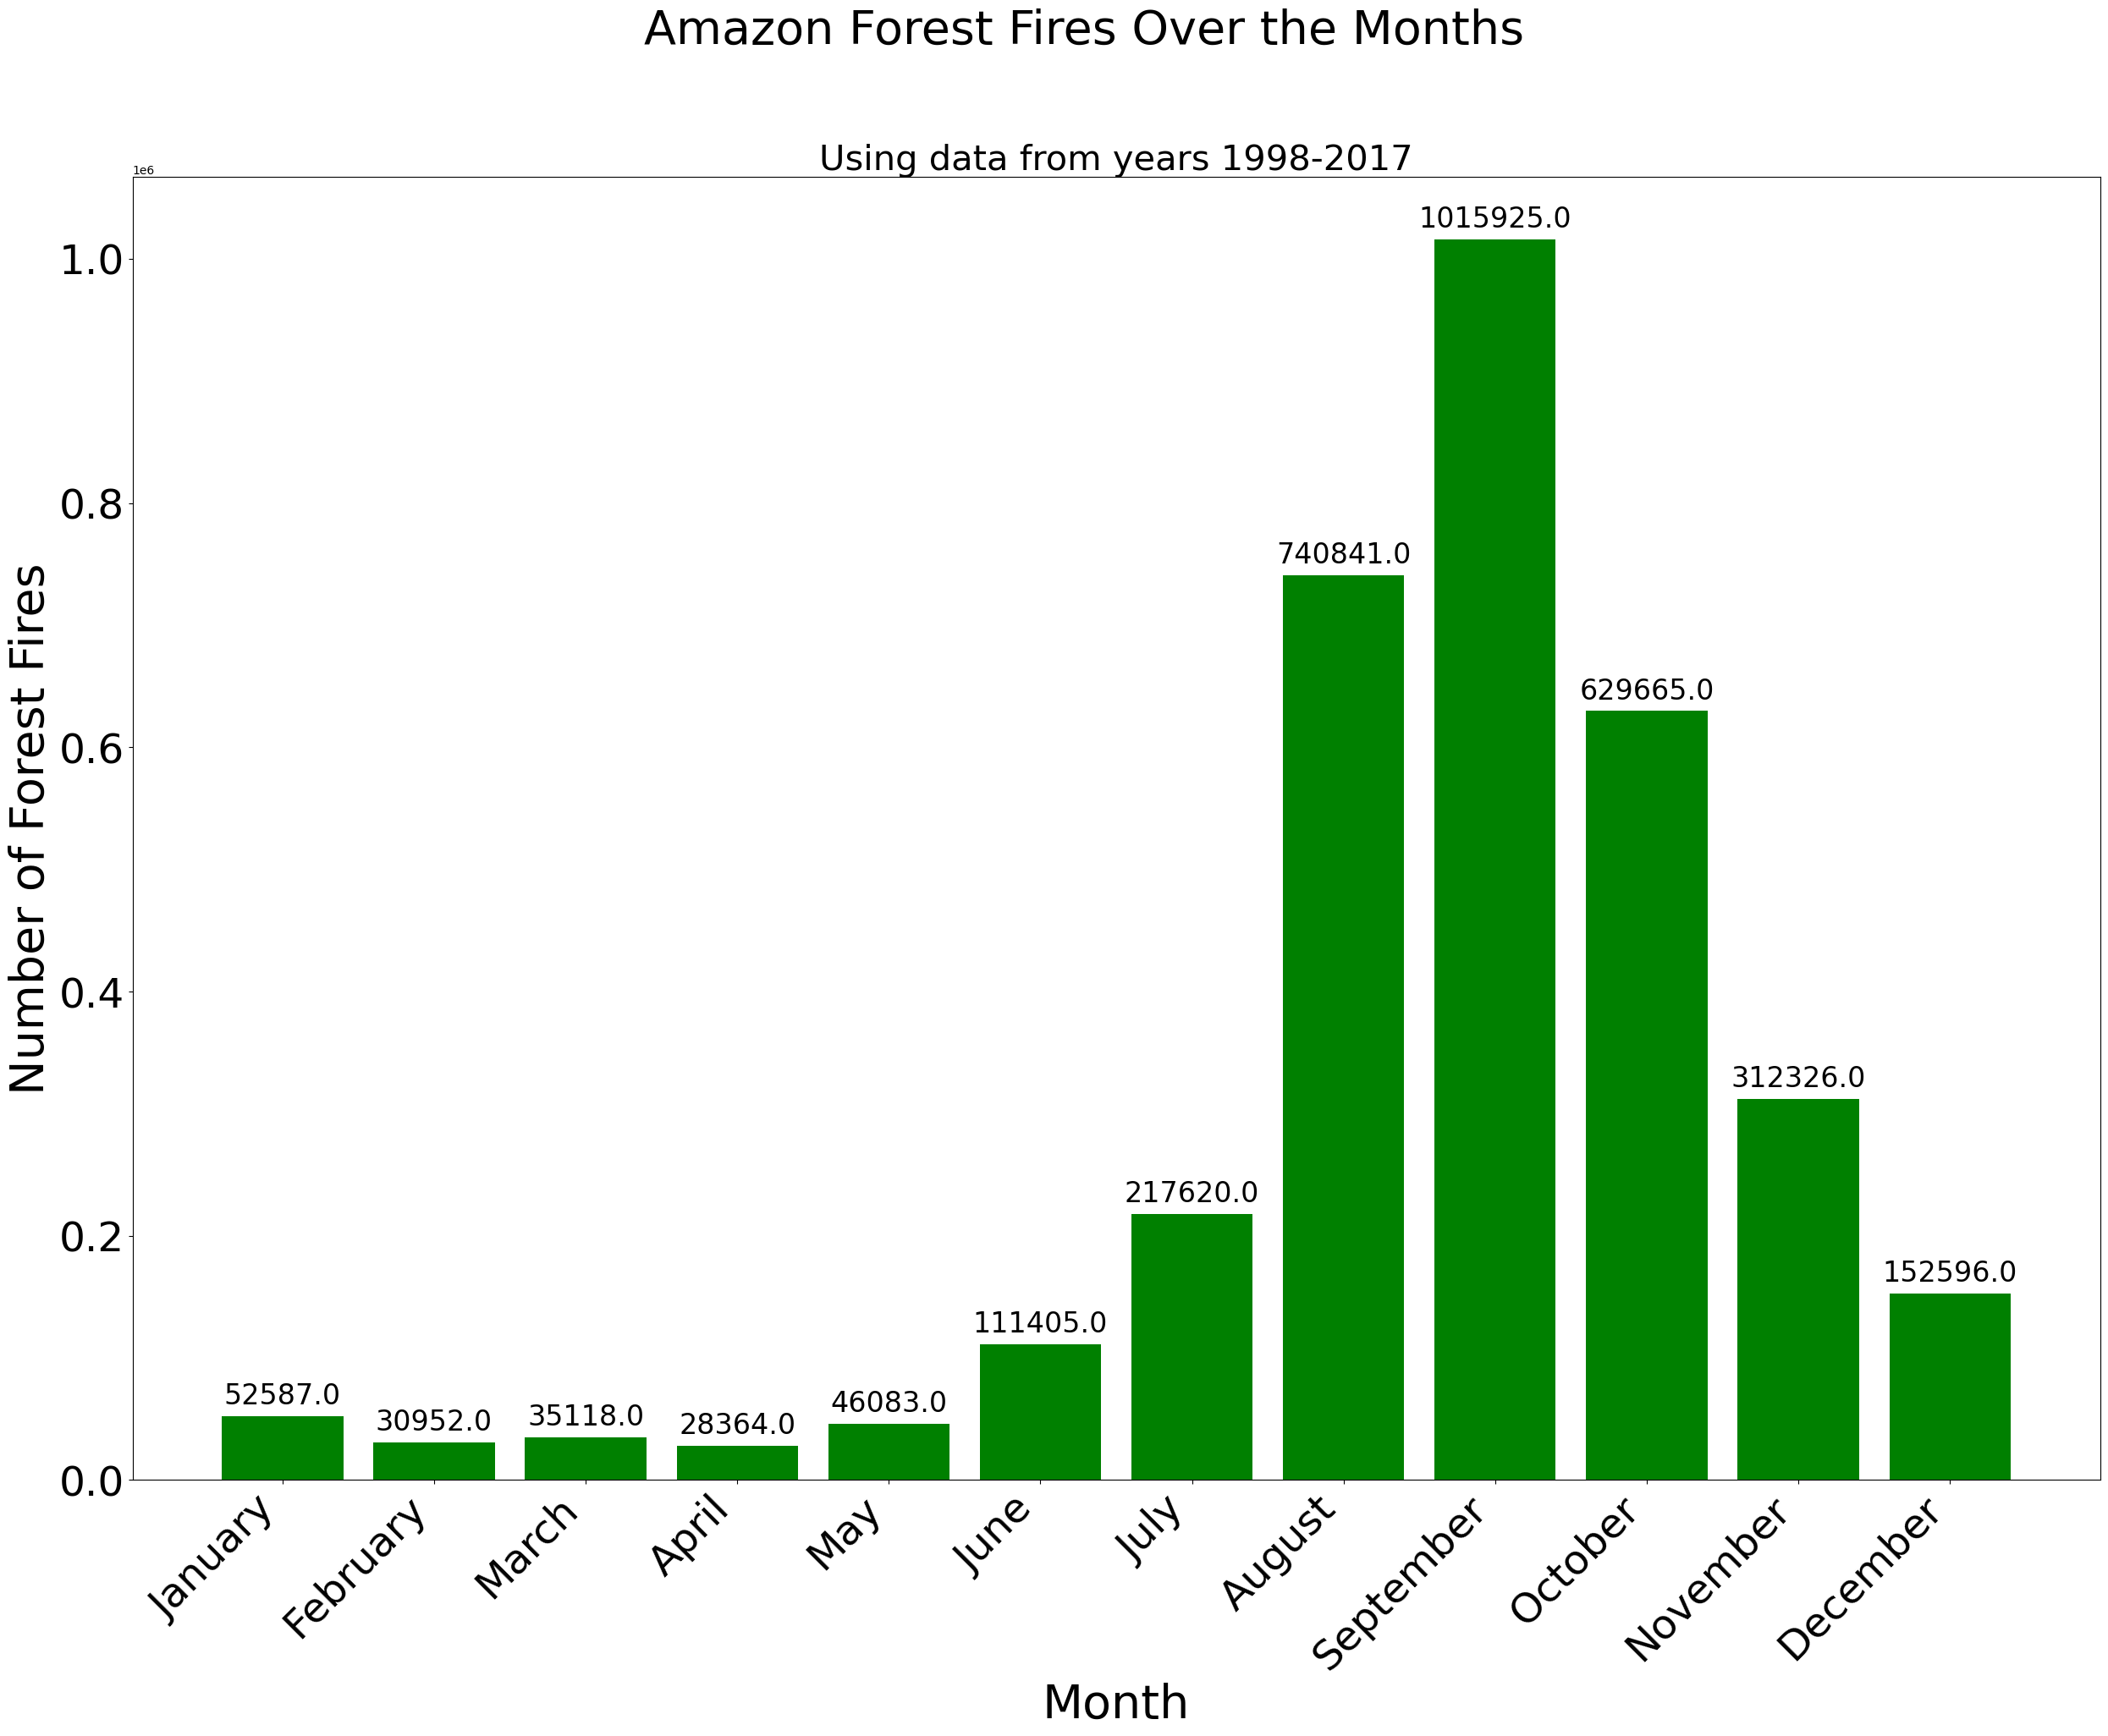

In [16]:
#Plotting the graph for Forest Fires Over the months

plt.figure(figsize=(30, 20))
plt.bar(forest_fire_per_month['month'], forest_fire_per_month['number'], color='green')

plt.suptitle('Amazon Forest Fires Over the Months', fontsize=40)
plt.title('Using data from years 1998-2017', fontsize=30)

plt.xlabel('Month', fontsize=40)
plt.ylabel('Number of Forest Fires',fontsize=40)

for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=24) 
    
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=35)
plt.setp(plt.gca().get_yticklabels(), fontsize=35)

In [17]:
#Grouping the data by state

fire_in_state = data.groupby('state')['number'].sum()
fire_in_state

state
Acre                 68345.0
Alagoas               4644.0
Amapa                25116.0
Amazonas            117467.0
Bahia               226979.0
Ceara                80162.0
Distrito Federal      3561.0
Espirito Santo        6546.0
Goias               111970.0
Maranhao            375279.0
Mato Grosso         767890.0
Minas Gerais        169223.0
Paraiba              65206.0
Pará                577841.0
Pernambuco           24498.0
Piau                178707.0
Rio                  50021.0
Rondonia            185387.0
Roraima              29454.0
Santa Catarina       27209.0
Sao Paulo            62308.0
Sergipe               3237.0
Tocantins           212432.0
Name: number, dtype: float64

In [18]:
#Converting series to DataFrame

fire_in_state = fire_in_state.to_frame()
fire_in_state

,number
state,
Acre,68345.0
Alagoas,4644.0
Amapa,25116.0
Amazonas,117467.0
Bahia,226979.0
Ceara,80162.0
Distrito Federal,3561.0
Espirito Santo,6546.0
Goias,111970.0


In [19]:
#Resetting the index

fire_in_state.reset_index(level=0, inplace=True)
fire_in_state

,state,number
0,Acre,68345.0
1,Alagoas,4644.0
2,Amapa,25116.0
3,Amazonas,117467.0
4,Bahia,226979.0
5,Ceara,80162.0
6,Distrito Federal,3561.0
7,Espirito Santo,6546.0
8,Goias,111970.0
9,Maranhao,375279.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

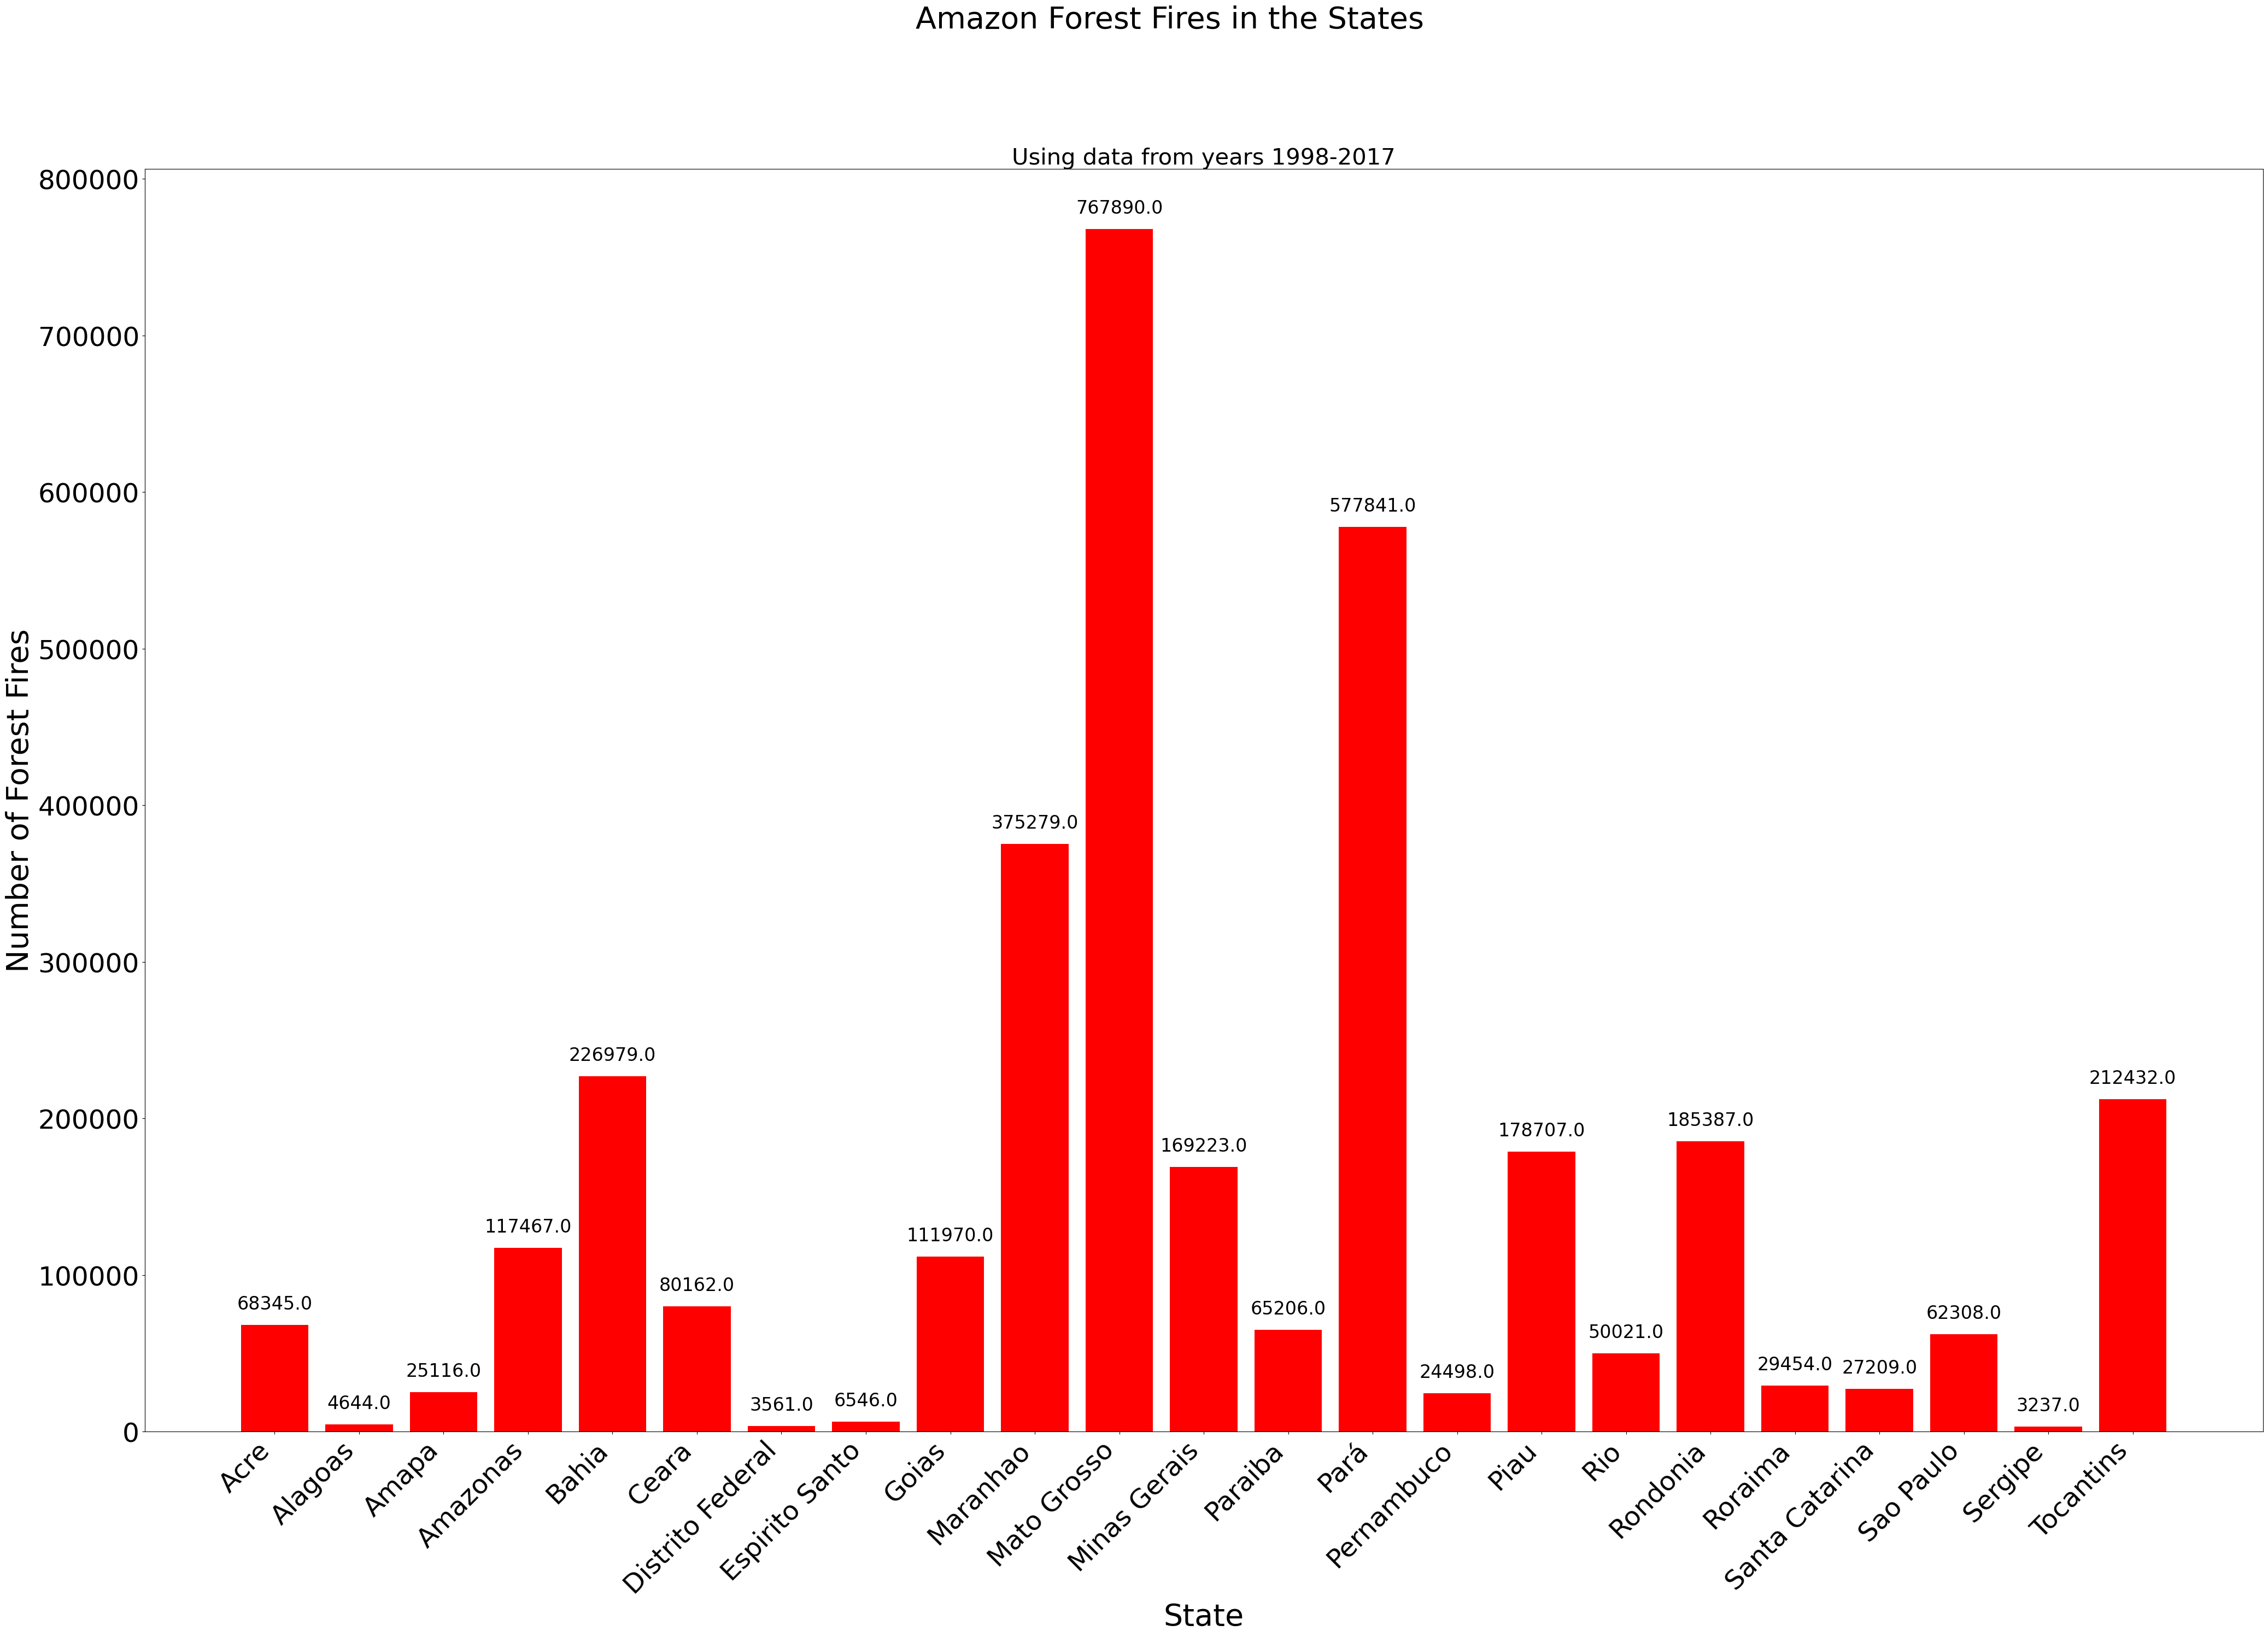

In [20]:
#Plotting the Forest Fire data for different states

plt.figure(figsize=(50, 30))
plt.bar(fire_in_state['state'], fire_in_state['number'], color='red')
plt.suptitle('Amazon Forest Fires in the States', fontsize=40)
plt.title('Using data from years 1998-2017', fontsize=30)
plt.xlabel('State', fontsize=40)
plt.ylabel('Number of Forest Fires',fontsize=40)

for i, num in enumerate(fire_in_state['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=24) 
    
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=35)
plt.setp(plt.gca().get_yticklabels(), fontsize=35)

In [21]:
#Grouping the data by Year

fire_per_year = data.groupby('year')['number'].sum()
fire_per_year = fire_per_year.to_frame()
fire_per_year.reset_index(level=0, inplace=True)
fire_per_year

,year,number
0,1998,123881.0
1,1999,132526.0
2,2000,97541.0
3,2001,137926.0
4,2002,220015.0
5,2003,208476.0
6,2004,248928.0
7,2005,224294.0
8,2006,123327.0
9,2007,206412.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

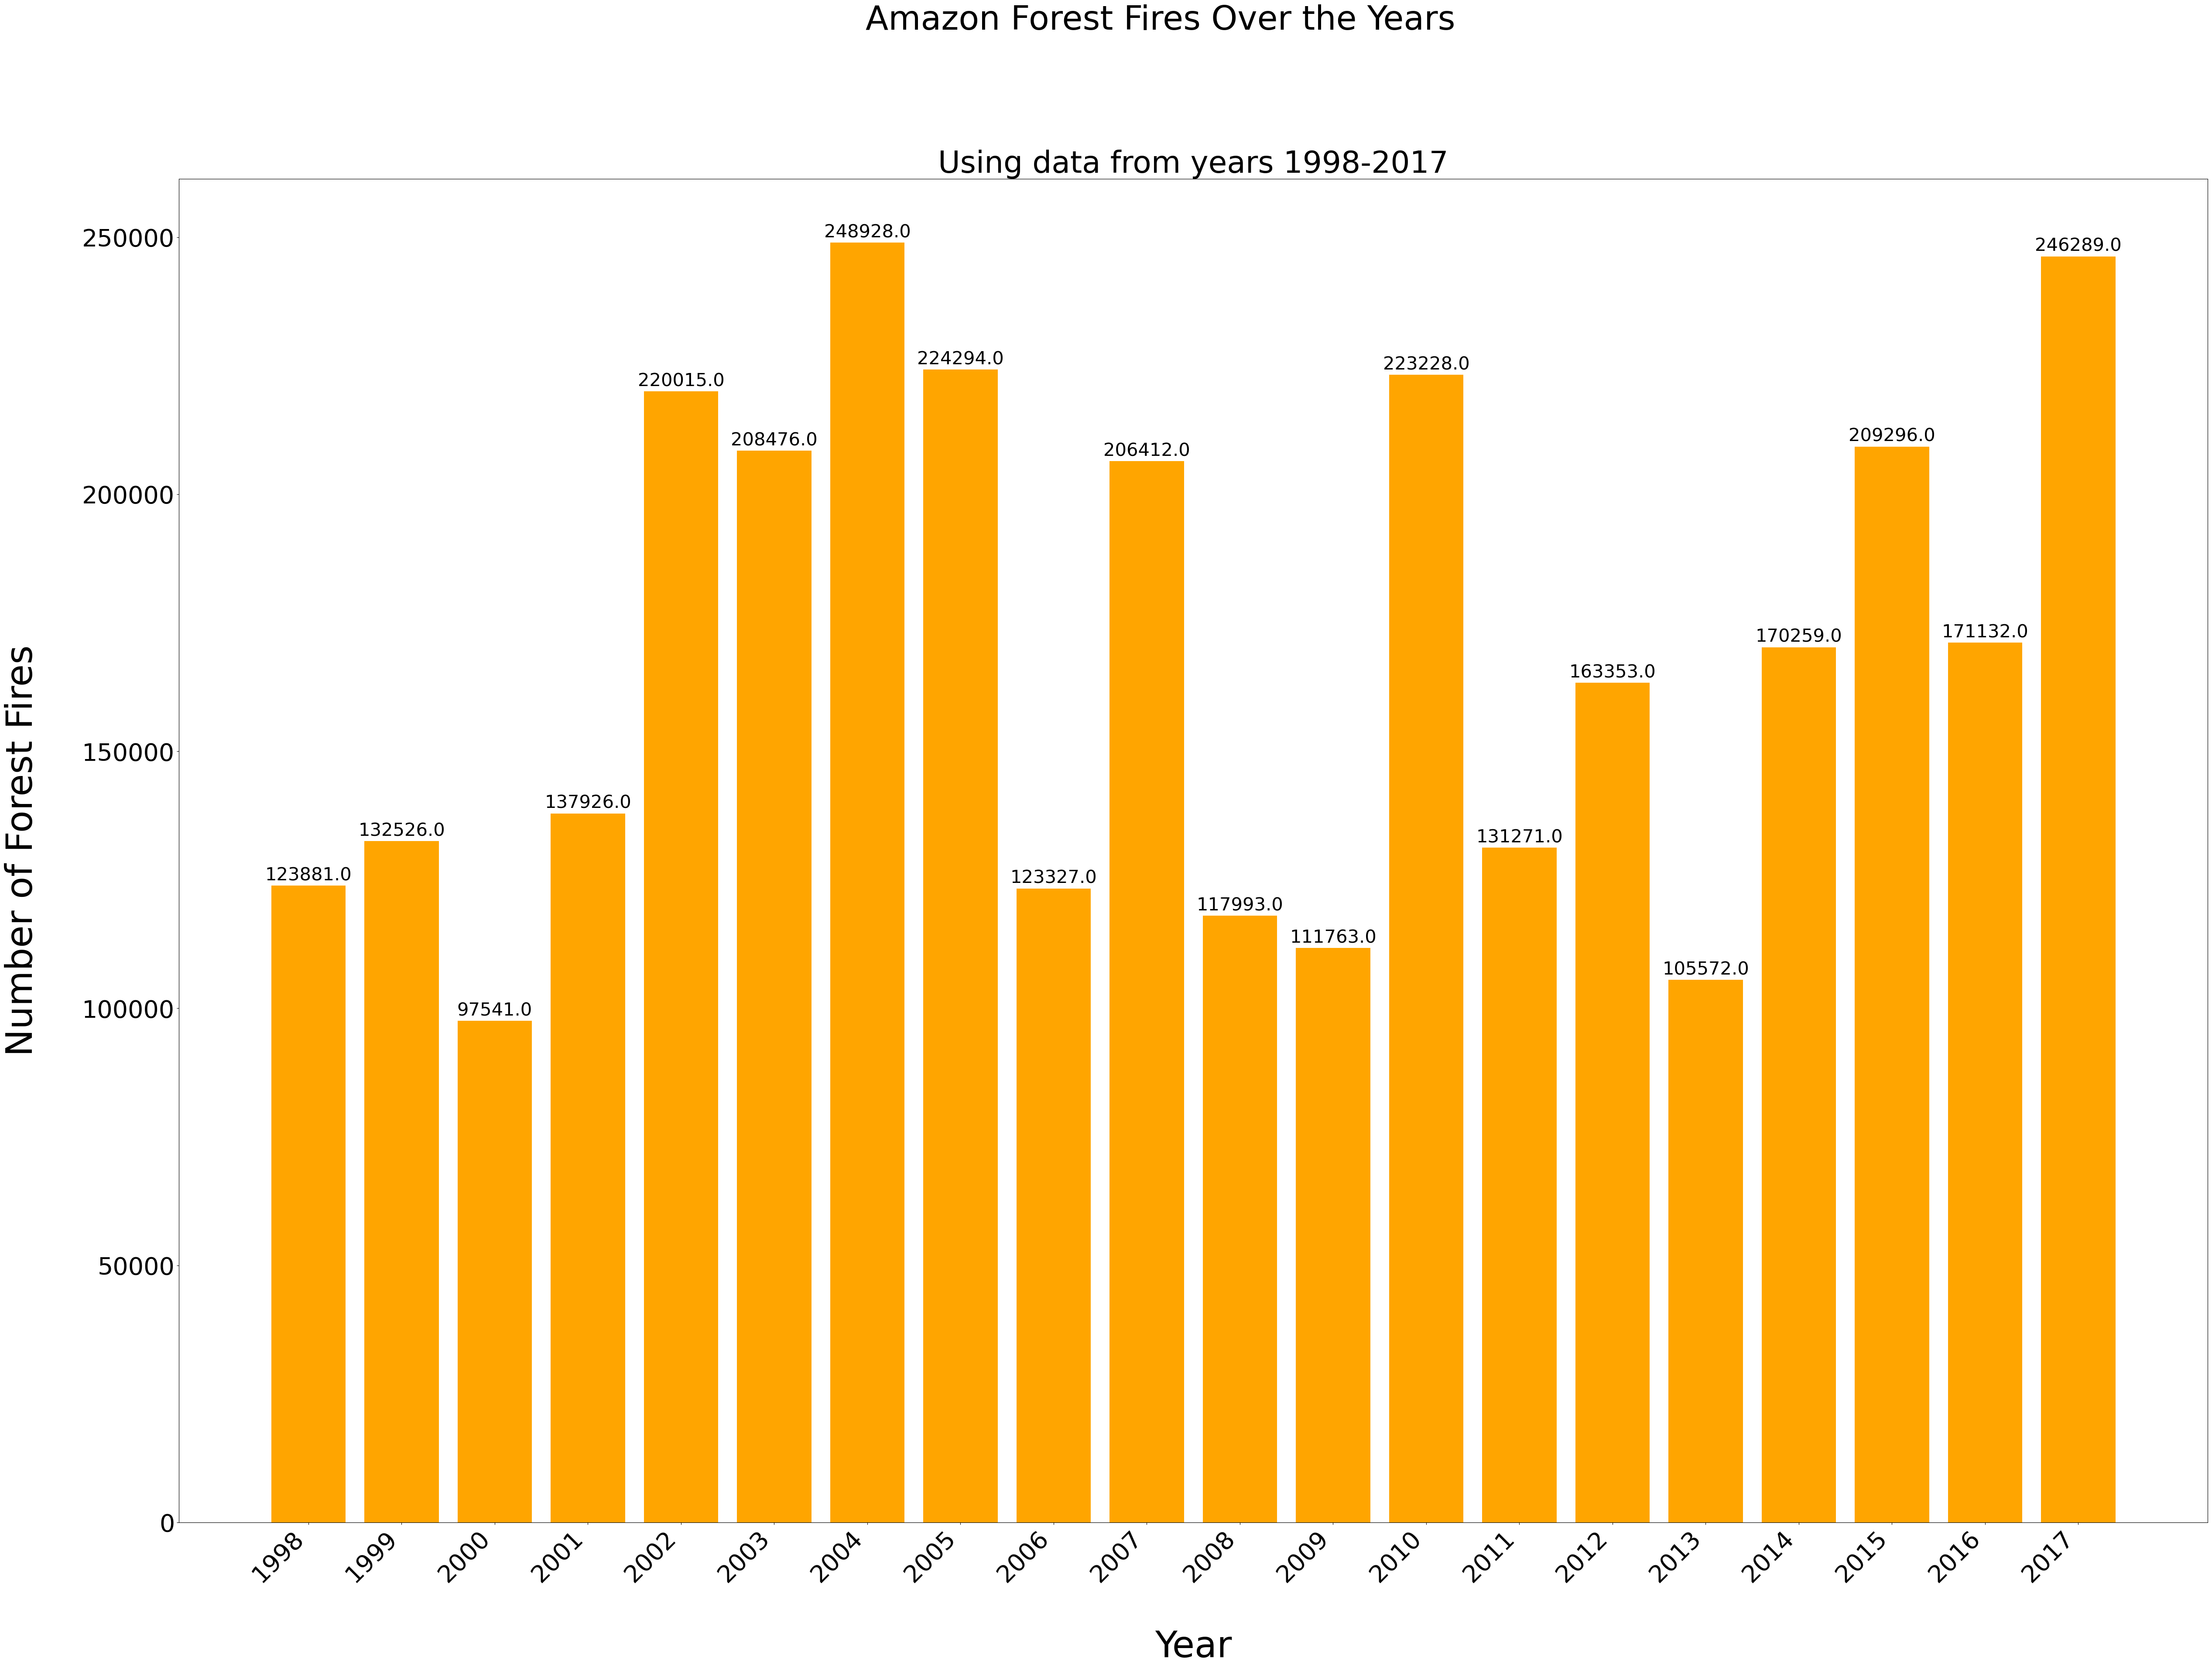

In [40]:
#Plotting the Forest Fire data over the years

plt.figure(figsize=(60, 40))
plt.bar(fire_per_year['year'],fire_per_year['number'],  color='orange')

plt.suptitle('Amazon Forest Fires Over the Years', fontsize=55)
plt.title('Using data from years 1998-2017', fontsize=50)

plt.xlabel('Year', fontsize=60, labelpad=70)
plt.ylabel('Number of Forest Fires',fontsize=60, labelpad=70)

plt.xticks(fire_per_year['year'])

for i, num in enumerate(fire_per_year['number']):
    plt.text(
        1998+i,
        num + 1000,
        num,
        ha='center',
        fontsize=30) 

plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=40)

plt.setp(plt.gca().get_yticklabels(), 
         fontsize=40)